In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/justinshenk/fer.git

cloning the fer repository

In [0]:
!pip install fer

installing the fer for emotion detection

In [4]:
cd /content/drive/My Drive/fer

/content/drive/My Drive/fer


In [5]:
from fer import FER
import cv2
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
real = []

In [0]:
real.extend(['positive']*33)
real.extend(['negative']*33)
real.extend(['neutral']*34)

testing on random faces collected 

In [0]:
#path = '/content/drive/My Drive/EmoPy/EmoPy/examples/image_data'
path = '/content/drive/My Drive/EmoPy/EmoPy/examples/image_data/val'
files = []
emo = []
for r,d,f in os.walk(path):
  for file in f:
    files.append(os.path.join(r, file))
detector = FER(mtcnn = True)
count = 0
for f in files:
  count+=1
  if f.split('.')[-1]=='jpg' or f.split('.')[-1]=='jpeg' or f.split('.')[-1]== 'png':
    im = cv2.imread(f)
    if detector.detect_emotions(im)!=[]:
        print(f)
        emotion, score = detector.top_emotion(im)
        if emotion in ['happy']:
          emotion = 'positive'
          emo.append(emotion)
        elif emotion not in  ['happy', 'neutral', 'surprise']:
          emotion = 'negative'
          emo.append(emotion)
        elif emotion in ['neutral', 'surprise'] :
          emotion = 'neutral'
          emo.append(emotion)
    elif detector.detect_emotions(im)==[]:
      emotion = 'none'
      emo.append('neutral')
emoticon = {'positive':0,'negative':0,'neutral':0}
print(emo)
for i in emo:
  if i in ['positive']:
    emoticon['positive']+=1
  elif i in  ['negative']:
    emoticon['negative']+=1
  elif i in ['neutral'] :
    emoticon['neutral']+=1
print(emoticon)
print(count)


{'positive': 29, 'negative': 32, 'neutral': 39}

100

08-02-2020:06:09:51,919 INFO     [utils.py:141] NumExpr defaulting to 2 threads.


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative'), Text(0, 2.5, 'neutral')]

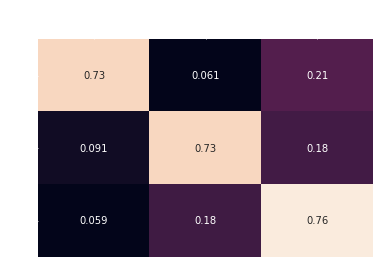

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real,emo,labels = ['positive','negative','neutral'])
cm = cm.astype(np.float)/cm.astype(np.float).sum(axis=1)[:,np.newaxis]
ax = plt.subplot()
sns.heatmap(cm,annot=True, ax = ax, cbar = False)
ax.title.set_color('white')
ax.set_xlabel('Predicted labels')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.tick_top()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.set_ticklabels(['positive', 'negative', 'neutral'])
ax.yaxis.set_ticklabels(['positive', 'negative', 'neutral'])